In [93]:
import pandas as pd
import numpy as np
#import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings("ignore")
np.random.seed(1995)

df = pd.read_csv("cell2cell-v1.csv")

print("The data size:", df.shape)

The data size: (71047, 72)


In [76]:
df.head()

,Unnamed: 0,X,customer,traintest,churn,churndep,revenue,mou,recchrge,directas,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1,1,1000002,0,0,NaN,57.492500,482.75,37.424999,0.2475,...,0,0,1,0,0,5,0,0,149.989990,0
1,2,2,1000006,0,0,NaN,82.275002,1312.25,75.000000,1.2375,...,0,1,0,0,0,6,0,0,9.989998,0
2,3,3,1000010,0,0,NaN,31.662500,25.50,29.990000,0.2475,...,0,0,1,0,0,9,0,0,29.989990,0
3,4,4,1000011,0,0,NaN,62.127499,97.50,65.985001,2.4750,...,0,1,0,0,0,6,0,0,29.989990,0
4,5,5,1000014,0,0,NaN,25.225000,2.50,25.000000,0.0000,...,0,1,0,0,0,7,0,0,29.989990,0


In [77]:
#Dropped columns that do not contribute to my churn prediction model
#traintest column is also dropped because i will split with sklearn.model_selection train_test_split
df.drop(df.columns[[0,1,2,3,5]], axis=1, inplace=True)

In [78]:
#dataframe check
df.head()

,churn,revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,0,57.492500,482.75,37.424999,0.2475,22.75,0.0,532.25,50.987499,8.333333,...,0,0,1,0,0,5,0,0,149.989990,0
1,0,82.275002,1312.25,75.000000,1.2375,0.00,0.0,156.75,8.145000,52.000000,...,0,1,0,0,0,6,0,0,9.989998,0
2,0,31.662500,25.50,29.990000,0.2475,0.00,0.0,59.50,4.027500,0.000000,...,0,0,1,0,0,9,0,0,29.989990,0
3,0,62.127499,97.50,65.985001,2.4750,0.00,0.0,23.50,6.822500,0.000000,...,0,1,0,0,0,6,0,0,29.989990,0
4,0,25.225000,2.50,25.000000,0.0000,0.00,0.0,-2.50,-0.225000,0.000000,...,0,1,0,0,0,7,0,0,29.989990,0


In [79]:
print(df.dtypes)

churn         int64
revenue     float64
mou         float64
recchrge    float64
directas    float64
overage     float64
roam        float64
changem     float64
changer     float64
dropvce     float64
blckvce     float64
unansvce    float64
custcare    float64
threeway    float64
mourec      float64
outcalls    float64
incalls     float64
peakvce     float64
opeakvce    float64
dropblk     float64
callfwdv    float64
callwait    float64
months        int64
uniqsubs      int64
actvsubs      int64
phones      float64
models      float64
eqpdays     float64
age1        float64
age2        float64
             ...   
webcap        int64
truck         int64
rv            int64
occprof       int64
occcler       int64
occcrft       int64
occstud       int64
occhmkr       int64
occret        int64
occself       int64
ownrent       int64
marryun       int64
marryyes      int64
mailord       int64
mailres       int64
mailflag      int64
travel        int64
pcown         int64
creditcd      int64


In [80]:
#checked null values, then filled them with rounded mean values
df.isna().sum()
df.fillna(round(df.mean()), inplace=True)

class 0: (50438, 67)
class 1: (20609, 67)
total class of 1 and 0: 
1    20609
0    20609
Name: churn, dtype: int64


,churn,revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,0,57.492500,482.75,37.424999,0.2475,22.75,0.0,532.25,50.987499,8.333333,...,0,0,1,0,0,5,0,0,149.989990,0
1,0,82.275002,1312.25,75.000000,1.2375,0.00,0.0,156.75,8.145000,52.000000,...,0,1,0,0,0,6,0,0,9.989998,0
2,0,31.662500,25.50,29.990000,0.2475,0.00,0.0,59.50,4.027500,0.000000,...,0,0,1,0,0,9,0,0,29.989990,0
3,0,62.127499,97.50,65.985001,2.4750,0.00,0.0,23.50,6.822500,0.000000,...,0,1,0,0,0,6,0,0,29.989990,0
4,0,25.225000,2.50,25.000000,0.0000,0.00,0.0,-2.50,-0.225000,0.000000,...,0,1,0,0,0,7,0,0,29.989990,0


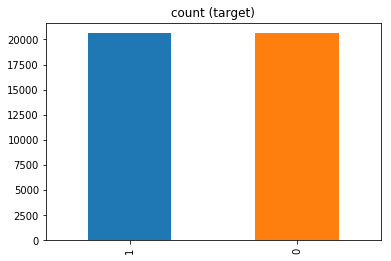

In [81]:
#IMBALANCED DATA PROBLEM -  SOLVED USING UNDERSAMPLING

# class counts
class_count_0, class_count_1 = df['churn'].value_counts()

# Separate classes
class_0 = df[df['churn'] == 0]
class_1 = df[df['churn'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class_0_under = class_0.sample(class_count_1)

df_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0: ")
print(df_under['churn'].value_counts())

# plot the counts after under-sampling
df_under['churn'].value_counts().plot(kind='bar', title='count (target)')

#Now i have 20609 instances with churn=1 and 20609 instances with churn=0 for a better model construction
      
df.head(5)

In [82]:
#actual, target variable
labels = np.array(df_under['churn'])

unique, counts = np.unique(df_under['churn'], return_counts=True)
print(dict(zip(unique, counts)))

#drop actual from df
df_under= df_under.drop('churn', axis = 1)

#After undersampling, new data size is 66 columns and 41218 rows, 20609 of the rows has churn=1, 20609 of them has churn=0
print("The data size:", df_under.shape)

{0: 20609, 1: 20609}
The data size: (41218, 66)


In [83]:
#Train-test splitting to train and validate regression models
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_under, labels, test_size = 0.30)

In [84]:
#target variable in test data
test_y
unique, counts = np.unique(test_y, return_counts=True)
print("Testing dataset:")
print(dict(zip(unique, counts)))
#6197 churn 1
#6169 not churn 0

#target variable in training data
test_y
unique, counts = np.unique(train_y, return_counts=True)
print("Training dataset:")
print(dict(zip(unique, counts)))
#14412 churn 1
#14440 not churn 0

#Data is balanced now

Testing dataset:
{0: 6183, 1: 6183}
Training dataset:
{0: 14426, 1: 14426}


In [98]:
#In my models, my main metrics will be accuracy and roc_auc scores

# cross-validation function
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

def val_model_1(X, y, clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("accuracy: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()


def val_model_2(X, y, clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("roc_auc: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

In [99]:
# score functions
def getClfAccuracyScores(train_x, train_y, *clf_list):

  model_name = []
  accuracy = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    accuracy.append(val_model_1(train_x, train_y, model))
  
  return pd.DataFrame(data=accuracy, index=model_name, columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)

def getClfRocAucScores(train_x, train_y, *clf_list):

  model_name = []
  roc_auc = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    roc_auc.append(val_model_2(train_x, train_y, model))
  
  return pd.DataFrame(data=roc_auc, index=model_name, columns=['Roc_Auc']).sort_values(by='Roc_Auc', ascending=False)

In [100]:
# standardizing train_x and test_x
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [101]:
# Model comparison to choose the one with the best performance using 5-fold cross validation
clf = DecisionTreeClassifier()
bgc = BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_features=4)
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
sgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

df_accuracy_scores = getClfAccuracyScores(train_x, train_y, clf, bgc, rfc, abc, sgb)
df_roc_auc_scores = getClfRocAucScores(train_x, train_y, clf, bgc, rfc, abc, sgb)

print(df_accuracy_scores)
print(df_roc_auc_scores)
#I will continue with GradientBoostingClassifier because it gives the highest accuracy and roc_auc rates

#####  DecisionTreeClassifier  #####
scores: [0.53950104 0.53847487 0.547487   0.55355286 0.53656846]
accuracy: 0.543 (+/- 0.01)
#####  BaggingClassifier  #####
scores: [0.61850312 0.60918544 0.61091854 0.60329289 0.60935875]
accuracy: 0.610 (+/- 0.00)
#####  RandomForestClassifier  #####
scores: [0.60481635 0.60329289 0.60225303 0.60121317 0.60762565]
accuracy: 0.604 (+/- 0.00)
#####  AdaBoostClassifier  #####
scores: [0.62127512 0.6135182  0.61663778 0.61109185 0.61854419]
accuracy: 0.616 (+/- 0.00)
#####  GradientBoostingClassifier  #####
scores: [0.62508663 0.6117851  0.62391681 0.61923744 0.62755633]
accuracy: 0.622 (+/- 0.01)
#####  DecisionTreeClassifier  #####
scores: [0.54106029 0.5440208  0.55493934 0.55025997 0.5339688 ]
roc_auc: 0.545 (+/- 0.01)
#####  BaggingClassifier  #####
scores: [0.66368642 0.65565048 0.6510164  0.64572254 0.65363432]
roc_auc: 0.654 (+/- 0.01)
#####  RandomForestClassifier  #####
scores: [0.6562483  0.65067417 0.64030481 0.64946442 0.6614054 ]
roc_auc

In [104]:
#Hyperparameter tuning for GradientBoostingClassifier to increase accuracy and roc_auc scores

param_test1 = {'learning_rate':[0.25,0.15,0.1,0.05,0.01], 'n_estimators':[100,200,300,500,600]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring=['accuracy', 'roc_auc'],refit='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_x,train_y)

gsearch1.best_params_, gsearch1.best_score_

#best option: 'learning_rate': 0.01, 'n_estimators': 600 

({'learning_rate': 0.01, 'n_estimators': 600}, 0.6271314575474021)

In [105]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring=['accuracy', 'roc_auc'],refit='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_x,train_y)
gsearch2.best_params_, gsearch2.best_score_

#best option: 'max_depth': 15, 'min_samples_split': 400

({'max_depth': 15, 'min_samples_split': 400}, 0.6276858941330345)

In [106]:
param_test3 = {'min_samples_split':range(400,1000,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=15,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring=['accuracy', 'roc_auc'],refit='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_x,train_y)
gsearch3.best_params_, gsearch3.best_score_

#best option: 'min_samples_leaf': 50, 'min_samples_split': 400

({'min_samples_leaf': 50, 'min_samples_split': 400}, 0.6270966153461821)

In [107]:
param_test4 = {'max_features':[2,3,4,5,6,7]}
gsearch4 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=15, min_samples_split=400, min_samples_leaf=50, subsample=0.8, random_state=10), 
param_grid = param_test4, scoring=['accuracy', 'roc_auc'],refit='accuracy',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_x,train_y)
gsearch4.best_params_, gsearch4.best_score_

#best option: 'max_features': 5

({'max_features': 5}, 0.6257798539774276)

In [108]:
param_test5 = {'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=15,min_samples_split=400, min_samples_leaf=50, subsample=0.8, random_state=10,max_features=5),
param_grid = param_test5, scoring=['accuracy', 'roc_auc'],refit='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_x,train_y)
gsearch5.best_params_, gsearch5.best_score_

#best option: 'subsample': 0.9

({'subsample': 0.9}, 0.6265769969409485)

In [109]:
#Create Gradient Boosting Classifier object after optimal parameter setting
sgb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=15, min_samples_split=400,min_samples_leaf=50, subsample=0.9, random_state=10, max_features=5)

#Train Adaptive Boosting Classifier object
sgb = sgb.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = sgb.predict(test_x)

print(confusion_matrix(test_y, y_pred)) #between actual and predicted target variable
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print ("ROC-AUC Score:", roc_auc_score(test_y, y_pred))
print ("Precision:", precision_score(test_y, y_pred))
print ("Recall:", recall_score(test_y, y_pred))
print ("F1 Score:", f1_score(test_y, y_pred))

[[3643 2540]
 [2134 4049]]
Accuracy: 0.6220281416787967
ROC-AUC Score: 0.6220281416787967
Precision: 0.6145090302018515
Recall: 0.6548601002749475
F1 Score: 0.6340432195427498
